<a href="https://www.kaggle.com/code/saidhamedsaidmohamed/superstore-sales-dataset?scriptVersionId=194199077" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supstore-dataset-2019-2022/superstore_dataset.csv


## Data wrangling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/kaggle/input/supstore-dataset-2019-2022/superstore_dataset.csv')

In [4]:
df.head(3)

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625


In [5]:
df.tail()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
9989,US-2023-126221,12/30/2022,1/5/2023,Chuck Clark,Eureka,Eureka The Boss Plus 12-Amp Hard Box Upright V...,Home Office,Office Supplies,Appliances,Central,47201,Columbus,Indiana,United States,0.0,56.5110,2,209.300,0.2700
9990,US-2023-143259,12/30/2022,1/3/2023,Patrick O'Donnell,Other,"Bush Westfield Collection Bookcases, Fully Ass...",Consumer,Furniture,Bookcases,East,10009,New York City,New York,United States,0.2,12.1176,4,323.136,0.0375
9991,US-2023-143259,12/30/2022,1/3/2023,Patrick O'Donnell,Wilson Jones,Wilson Jones Legal Size Ring Binders,Consumer,Office Supplies,Binders,East,10009,New York City,New York,United States,0.2,19.7910,3,52.776,0.3750
9992,US-2023-143259,12/30/2022,1/3/2023,Patrick O'Donnell,Other,Gear Head AU3700S Headset,Consumer,Technology,Phones,East,10009,New York City,New York,United States,0.0,2.7279,7,90.930,0.0300
9993,US-2023-156720,12/30/2022,1/3/2023,Jill Matthias,Other,Bagged Rubber Bands,Consumer,Office Supplies,Fasteners,West,80538,Loveland,Colorado,United States,0.2,-0.6048,3,3.024,-0.2000


 checking data type and missing values

In [6]:
df.describe()

,zip,discount,profit,quantity,sales,profit_margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371723,0.156203,28.656896,3.789574,229.858001,0.120314
std,32063.705315,0.206452,234.260108,2.225110,623.245101,0.466754
min,1040.000000,0.000000,-6599.978000,1.000000,0.444000,-2.750000
25%,23223.000000,0.000000,1.728750,2.000000,17.280000,0.075000
50%,56430.500000,0.200000,8.666500,3.000000,54.490000,0.270000
75%,90008.000000,0.200000,29.364000,5.000000,209.940000,0.362500
max,99301.000000,0.800000,8399.976000,14.000000,22638.480000,0.500000


In [7]:
df.shape

(9994, 19)

In [8]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

In [10]:
df.isnull().sum()

order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df_cat=df[['customer','manufactory','product_name','segment','category','subcategory','region','city','state','country']]

In [15]:
df_cat.nunique()

customer         793
manufactory      182
product_name    1849
segment            3
category           3
subcategory       17
region             4
city             531
state             49
country            1
dtype: int64

#  Exploratory Data Analysis 


In [16]:
df.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


#### 1- What are the top selling products in the superstore?

In [17]:
product_group_sales=df.groupby(['product_name']).sum()['sales']

In [18]:
product_group_sales.head()

product_name
"While you Were Out" Message Book, One Form per Page     25.228
#10 Gummed Flap White Envelopes, 100/Box                 41.300
#10 Self-Seal White Envelopes                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 286.672
Name: sales, dtype: float64

In [19]:
top_5_selling_products=product_group_sales.sort_values(ascending=False)[:5]

In [20]:
top_5_selling_products

product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: sales, dtype: float64

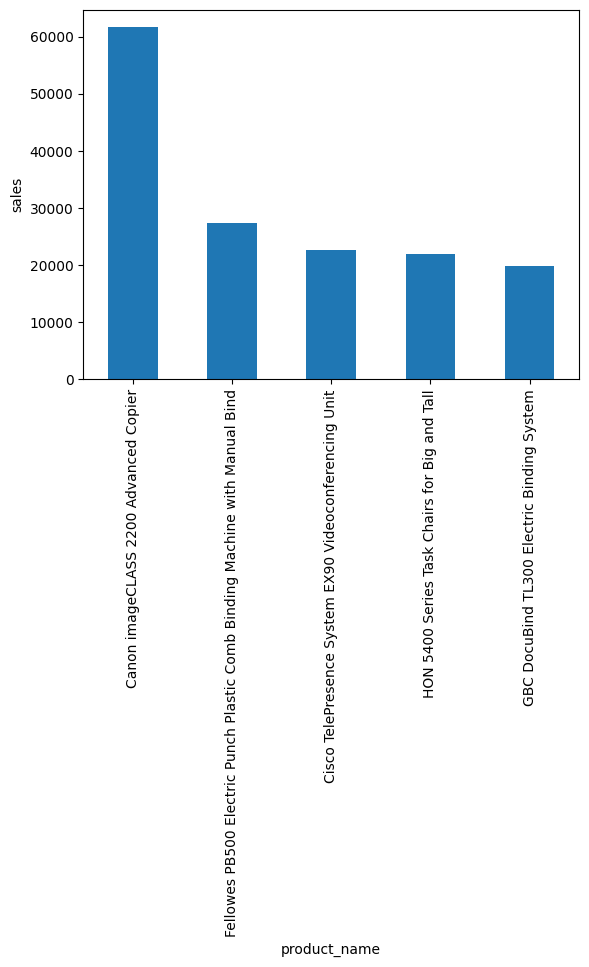

In [21]:

top_5_selling_products.plot(kind="bar")
plt.xlabel("product_name")
plt.ylabel("sales")
plt.show()

#### 2- What are the top profits products in the superstore?

In [22]:
product_group_profit=df.groupby(['product_name']).sum()['profit']

In [23]:
product_group_profit.head()

product_name
"While you Were Out" Message Book, One Form per Page     10.3880
#10 Gummed Flap White Envelopes, 100/Box                 16.7678
#10 Self-Seal White Envelopes                            52.1230
#10 White Business Envelopes,4 1/8 x 9 1/2              223.1408
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 115.2806
Name: profit, dtype: float64

In [24]:
top_5_profit_products=product_group_profit.sort_values(ascending=False)[:5]

In [25]:
top_5_profit_products

product_name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: profit, dtype: float64

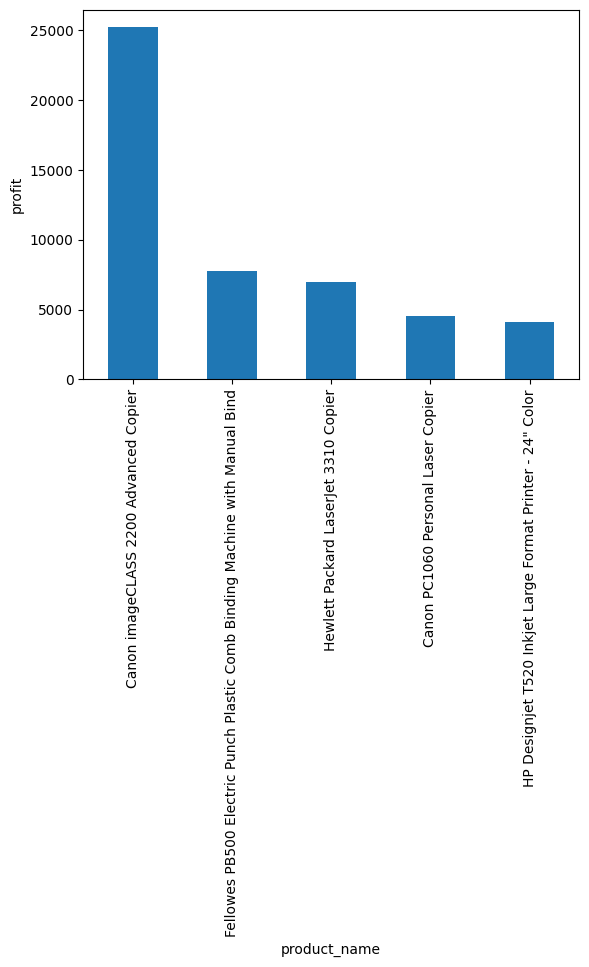

In [26]:
top_5_profit_products.plot(kind="bar")
plt.xlabel("product_name")
plt.ylabel("profit")
plt.show()

In [27]:
top_5_selling_products.index==top_5_profit_products.index

array([ True,  True, False, False, False])

In [28]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

In [29]:
category = df.groupby("category").sum()["sales"].sort_values(ascending=False)
category


category
Technology         836154.0330
Furniture          741718.4233
Office Supplies    719047.0320
Name: sales, dtype: float64

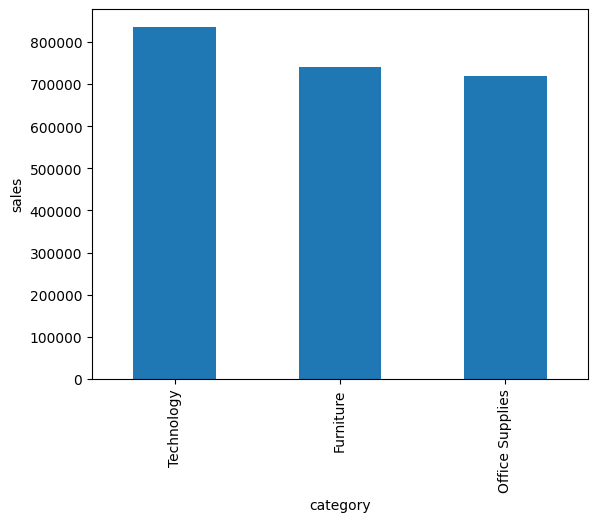

In [30]:
category.plot(kind="bar")
plt.ylabel("sales")
plt.show()

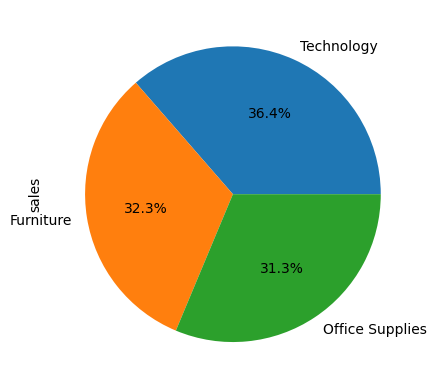

In [31]:
category.plot.pie(autopct='%1.1f%%')
plt.show()

#### 3- Which region generates the most sales and profit?


In [32]:
df['region'].unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [33]:
region_sales=df.groupby('region').sum()['sales'].sort_values(ascending=False)
region_sales

region
West       725457.8245
East       678499.8680
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64

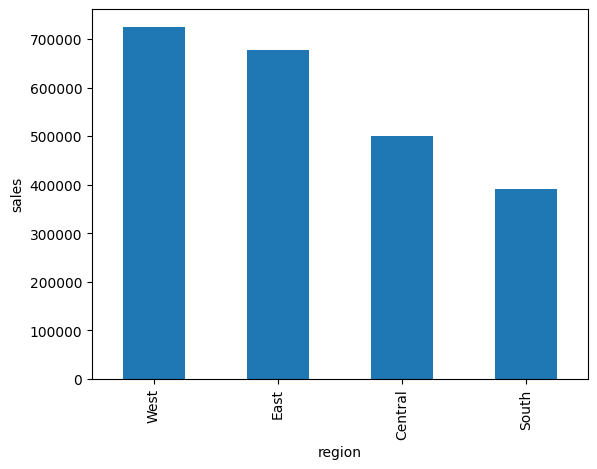

In [34]:
region_sales.plot(kind="bar")
plt.title=("regions generate the most sales")
plt.ylabel("sales")
plt.show()

#### -The West Region generates the most sales.


In [35]:
region_profit=df.groupby('region').sum()['profit'].sort_values(ascending=False)

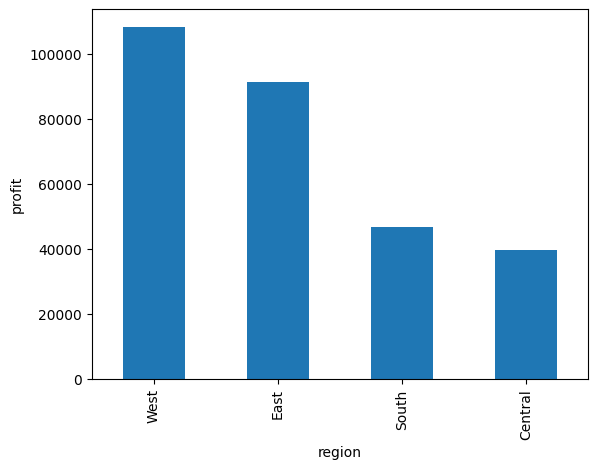

In [36]:
region_profit.plot(kind="bar")
plt.title=("regions generate the most sales")
plt.ylabel("profit")
plt.show()

#### -The *West Region* generates the most profit.


#### Number of each state's superstors and top 10

In [37]:
top10 =df['state'].value_counts().head(10)
top10

state
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               468
Florida            383
Michigan           255
North Carolina     249
Name: count, dtype: int64

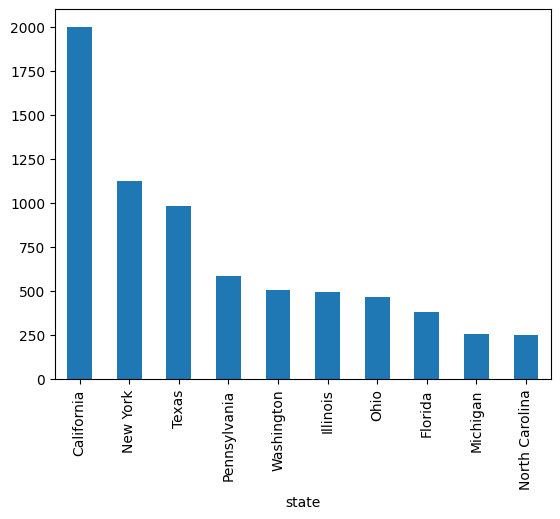

In [38]:
top10.plot(kind="bar")
plt.show()

#### 4- What is the sales trend over time (monthly, yearly)?


In [39]:
df["order_date"]=pd.to_datetime(df["order_date"])

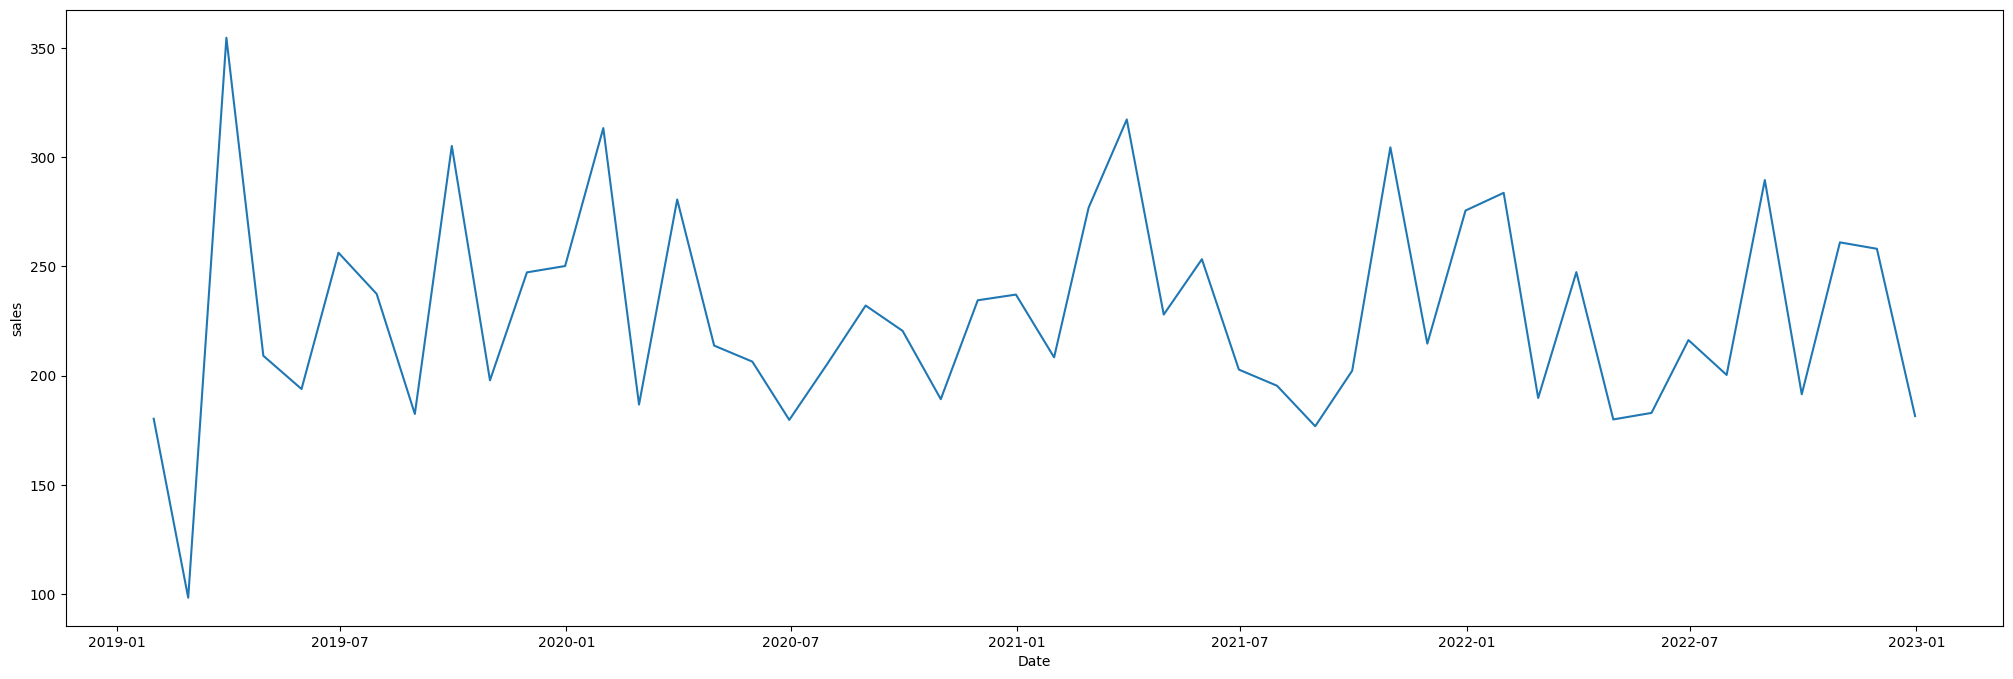

In [40]:
df.set_index("order_date",inplace=True)
series=df.sales.resample('ME').mean() 
plt.figure(figsize=(25, 8))
plt.plot(series)
plt.xlabel('Date')
plt.ylabel('sales')
plt.show()


#### 5-What is the impact of discounts on sales?


In [41]:
df.discount.value_counts()

discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

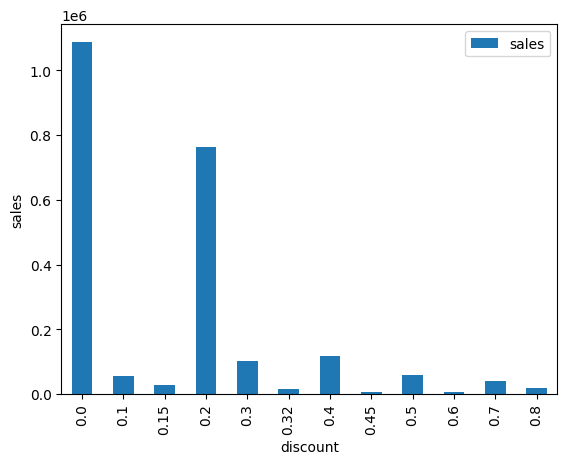

In [42]:
discount_group=df.groupby(["discount"]).sum()[["sales"]]
ax=discount_group.plot(kind="bar")
plt.ylabel("sales")
plt.show()

## customer

In [43]:
segment= df.segment.value_counts()
segment

segment
Consumer       5191
Corporate      3020
Home Office    1782
Name: count, dtype: int64

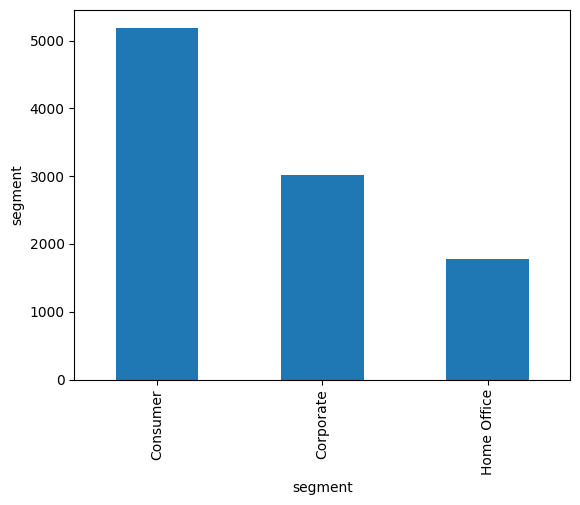

In [44]:
segment.plot(kind="bar")
plt.ylabel("segment")
plt.show()

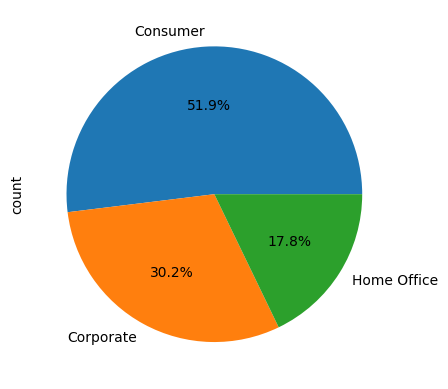

In [45]:
segment.plot.pie(autopct='%1.1f%%')
plt.show()

# thank you